In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as prep
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import LogisticRegression

In [62]:
#import data
clean=pd.read_csv('clean_kaggle_data_2022.csv')
clean.head()


,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN,NaN
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
4,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,13.0,"200,000-299,999"


In [63]:
clean.shape

(8137, 298)

# **Data cleaning**

In [64]:
# set index
clean.reset_index(inplace = True, drop = True)
#clean.Q29_Encoded.nunique()
clean.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN,NaN
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
4,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,13.0,"200,000-299,999"


In [65]:
clean.shape

(8137, 298)

In [66]:
#Drop some columns with 80% null values
miss_80 = [] 
t80 = 0.8*clean.shape[0]
for col in clean.columns:
    n_nan = clean[col].isnull().sum()
    if n_nan >= t80 :
        miss_80.append(col)
        clean.drop([col], axis=1, inplace = True)
print("Number of remaining columns:", clean.shape[1])
print('Number of columns deleted:', len(miss_80))
print("The following columns are dropped")
print ('\n'.join(miss_80))

Number of remaining columns: 79
Number of columns deleted: 219
The following columns are dropped
Q6_2
Q6_4
Q6_5
Q6_6
Q6_8
Q6_9
Q6_11
Q7_3
Q7_6
Q7_7
Q10_1
Q10_2
Q10_3
Q12_4
Q12_5
Q12_6
Q12_7
Q12_8
Q12_9
Q12_10
Q12_11
Q12_12
Q12_13
Q12_14
Q12_15
Q13_2
Q13_3
Q13_6
Q13_8
Q13_9
Q13_10
Q13_12
Q13_13
Q13_14
Q14_3
Q14_4
Q14_5
Q14_6
Q14_7
Q14_8
Q14_9
Q14_10
Q14_11
Q14_12
Q14_13
Q14_14
Q14_16
Q15_5
Q15_6
Q15_7
Q15_8
Q15_9
Q15_10
Q15_11
Q15_12
Q15_13
Q15_14
Q15_15
Q17_5
Q17_7
Q17_8
Q17_9
Q17_10
Q17_11
Q17_12
Q17_13
Q17_14
Q17_15
Q18_4
Q18_5
Q18_6
Q18_8
Q18_9
Q18_10
Q18_11
Q18_12
Q18_13
Q18_14
Q19_1
Q19_2
Q19_3
Q19_4
Q19_5
Q19_6
Q19_7
Q19_8
Q20_1
Q20_2
Q20_3
Q20_4
Q20_5
Q20_6
Q21_1
Q21_2
Q21_3
Q21_4
Q21_5
Q21_6
Q21_7
Q21_10
Q22
Q28_6
Q28_7
Q28_8
Q31_2
Q31_4
Q31_5
Q31_6
Q31_7
Q31_8
Q31_9
Q31_10
Q31_11
Q31_12
Q33_1
Q33_2
Q33_3
Q33_4
Q33_5
Q34_1
Q34_2
Q34_3
Q34_4
Q34_5
Q34_6
Q34_7
Q34_8
Q35_2
Q35_3
Q35_4
Q35_5
Q35_6
Q35_7
Q35_8
Q35_9
Q35_10
Q35_11
Q35_12
Q35_13
Q35_14
Q35_15
Q35_16
Q36_1
Q36_2
Q36_3


In [67]:
# Drop all columns that contain 'OTHER'
# Since the response "Other" contains unnecessary info, i drop all the columns with answer "Other".
# the columns that contain 'Other': 'Q7_7','Q12_15','Q13_14','Q14_16','Q15_15','Q17_15','Q18_14','Q19_8','Q20_6','Q28_8','Q31_12','Q33_5','Q34_8','Q35_16','Q36_15', 'Q37_13','Q38_8','Q39_12','Q40_15','Q41_9','Q42_9' and 'Q44_12' were dropped in first step because the percentage of nan values >=80%

In [68]:
clean.drop(['Q6_12'], axis=1, inplace=True)
clean.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_3,Q6_7,Q6_10,Q7_1,...,Q43,Q44_1,Q44_2,Q44_4,Q44_5,Q44_6,Q44_8,Q44_9,Q29_Encoded,Q29_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,What products or platforms did you find to be ...,...,Approximately how many times have you used a T...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN,NaN
1,851,55-59,Man,France,No,Coursera,Kaggle Learn Courses,Udemy,NaN,NaN,...,2-5 times,Twitter (data science influencers),NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,2.0,"20,000-29,999"
2,501,30-34,Man,Germany,No,Coursera,NaN,Udemy,NaN,University courses,...,NaN,Twitter (data science influencers),"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,10.0,"100,000-124,999"
3,787,70+,Man,Australia,No,Coursera,Kaggle Learn Courses,NaN,NaN,NaN,...,Never,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
4,1132,40-44,Man,United States of America,No,Coursera,Kaggle Learn Courses,Udemy,NaN,University courses,...,2-5 times,Twitter (data science influencers),"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,13.0,"200,000-299,999"


In [69]:
# Drop unnecessary features
# Since response time is not related to target variable, drop it. Besides, 'Q29' and 'Q29_buckets' can be dropped because 'Q29_Encoded' can replace them.

In [70]:
clean.drop(['Duration (in seconds)','Q29','Q29_buckets'], axis=1, inplace=True)
clean.head()

,Q2,Q3,Q4,Q5,Q6_1,Q6_3,Q6_7,Q6_10,Q7_1,Q7_2,...,Q42_8,Q43,Q44_1,Q44_2,Q44_4,Q44_5,Q44_6,Q44_8,Q44_9,Q29_Encoded
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,...,Do you use any of the following types of speci...,Approximately how many times have you used a T...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN
1,55-59,Man,France,No,Coursera,Kaggle Learn Courses,Udemy,NaN,NaN,"Online courses (Coursera, EdX, etc)",...,NaN,2-5 times,Twitter (data science influencers),NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,2.0
2,30-34,Man,Germany,No,Coursera,NaN,Udemy,NaN,University courses,"Online courses (Coursera, EdX, etc)",...,NaN,NaN,Twitter (data science influencers),"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,10.0
3,70+,Man,Australia,No,Coursera,Kaggle Learn Courses,NaN,NaN,NaN,NaN,...,None,Never,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,NaN,NaN,NaN,NaN,10.0
4,40-44,Man,United States of America,No,Coursera,Kaggle Learn Courses,Udemy,NaN,University courses,"Online courses (Coursera, EdX, etc)",...,NaN,2-5 times,Twitter (data science influencers),"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,13.0


In [71]:
#  Categorical data with order
# There are 7 questions with categorical answers. i first fill the missing values with the mode and then convert categorical data into numerical data.

In [72]:
categoric = ['Q8','Q11','Q43','Q16','Q25','Q26','Q30']
clean.loc[0,categoric]

Q8     What is the highest level of formal education ...
Q11    For how many years have you been writing code ...
Q43    Approximately how many times have you used a T...
Q16    For how many years have you used machine learn...
Q25    What is the size of the company where you are ...
Q26    Approximately how many individuals are respons...
Q30    Approximately how much money have you spent on...
Name: 0, dtype: object

In [73]:
print(clean[categoric].isna().sum())
clean.fillna({x: clean.loc[:,x].mode()[0] for x in categoric}, inplace=True)
print(clean[categoric].isna().sum())

Q8        0
Q11       0
Q43    3723
Q16     684
Q25       0
Q26       0
Q30      50
dtype: int64
Q8     0
Q11    0
Q43    0
Q16    0
Q25    0
Q26    0
Q30    0
dtype: int64


In [74]:
# Q8, the education level can be encoded and labeled from low to high. "I prefer not to answer" will be treated as missing values and be replaced by mode, since the answer would fit in the one of the other class.

In [75]:
clean['Q8'].unique()

array(['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       'Some college/university study without earning a bachelor’s degree',
       'Bachelor’s degree', 'Doctoral degree', 'Master’s degree',
       'I prefer not to answer', 'No formal education past high school',
       'Professional doctorate'], dtype=object)

In [76]:
# Remove 'I prefer not to answer'
clean['Q8'].replace({'I prefer not to answer' : clean['Q8'].mode().values} , inplace=True)
print(clean['Q8'])
print('NAN value in Q8:', clean['Q8'].isna().sum())
Q8_encoded = {
    'No formal education past high school' : 0,
    'Some college/university study without earning a bachelor’s degree' : 1,
    'Bachelor’s degree' : 2,
    'Master’s degree' : 3,
    'Doctoral degree' : 4,
    'Professional doctorate' : 5
}

clean.loc[1:,'Q8'] = clean.loc[1:,'Q8'].map(Q8_encoded)
clean.loc[1:,'Q8'] = clean.loc[1:,'Q8'].astype(int)
clean['Q8'].unique()

0       What is the highest level of formal education ...
1       Some college/university study without earning ...
2                                       Bachelor’s degree
3                                         Doctoral degree
4                                         Doctoral degree
                              ...                        
8132                                      Master’s degree
8133                                      Master’s degree
8134                                    Bachelor’s degree
8135                                      Master’s degree
8136                                      Doctoral degree
Name: Q8, Length: 8137, dtype: object
NAN value in Q8: 0


array(['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       1, 2, 4, 3, 0, 5], dtype=object)

In [77]:
# Q11, the experience in writing code or programming can be encoded and labeled from low to high.

In [78]:
clean['Q11'].unique()

array(['For how many years have you been writing code and/or programming?',
       '10-20 years', '20+ years', '5-10 years', '3-5 years', '< 1 years',
       '1-3 years', 'I have never written code'], dtype=object)

In [79]:
clean['Q11']
print(clean['Q11'].isna().sum())
print(clean['Q11'])

0
0       For how many years have you been writing code ...
1                                             10-20 years
2                                             10-20 years
3                                               20+ years
4                                             10-20 years
                              ...                        
8132                                          10-20 years
8133                                            1-3 years
8134                                            1-3 years
8135                                            < 1 years
8136                                            3-5 years
Name: Q11, Length: 8137, dtype: object


In [80]:
Q11_encoded = {
    'I have never written code': 0,
    '< 1 years' : 1,
    '1-3 years': 2,
    '3-5 years': 3,
    '5-10 years': 4,
    '10-20 years': 5,
    '20+ years': 6
}

clean.loc[1:,'Q11'] = clean.loc[1:,'Q11'].map(Q11_encoded)
clean.loc[1:,'Q11'] = clean.loc[1:,'Q11'].astype(int)
clean['Q11'].unique()

array(['For how many years have you been writing code and/or programming?',
       5, 6, 4, 3, 1, 2, 0], dtype=object)

In [81]:
# Q16, the experience in machine learning can be encoded and labeled from low to high.

In [82]:
clean['Q16'].unique()
Q16_encoded = {
    'I do not use machine learning methods': 0,
    'Under 1 year': 1,
    '1-2 years': 2,
    '2-3 years': 3,
    '3-4 years': 4,
    '4-5 years': 5,
    '5-10 years': 6,
    '10-20 years': 7,
    '20 or more years': 8
}

clean.loc[1:,'Q16'] = clean.loc[1:,'Q16'].map(Q16_encoded)
clean.loc[1:,'Q16'] = clean.loc[1:,'Q16'].astype(int)
clean['Q16'].unique()

array(['For how many years have you used machine learning methods?', 2, 5,
       6, 3, 1, 4, 7, 0], dtype=object)

In [83]:
# Q25, the size of a company can be encoded and labeled from low to high.

In [84]:
clean['Q25'].unique()

array(['What is the size of the company where you are employed?',
       '0-49 employees', '250-999 employees', '1000-9,999 employees',
       '50-249 employees', '10,000 or more employees'], dtype=object)

In [85]:
Q25_encoded = {
    '0-49 employees': 0,
    '50-249 employees': 1,
    '250-999 employees': 2,
    '1000-9,999 employees': 3,
    '10,000 or more employees': 4
}

clean.loc[1:,'Q25'] = clean.loc[1:,'Q25'].map(Q25_encoded)
clean.loc[1:,'Q25'] = clean.loc[1:,'Q25'].astype(int)
clean['Q25'].unique()

array(['What is the size of the company where you are employed?', 0, 2, 3,
       1, 4], dtype=object)

In [86]:
# Q26, the size of individuals who are responsible for data science workloads at workplace can be ranged from low to high.

In [87]:
clean['Q26'].unique()

array(['Approximately how many individuals are responsible for data science workloads at your place of business?',
       '1-2', '20+', '3-4', '5-9', '0', '10-14', '15-19'], dtype=object)

In [88]:
Q26_encoded = {
    '0': 0,
    '1-2': 1,
    '3-4': 2,
    '5-9': 3,
    '10-14': 4,
    '15-19': 5,
    '20+': 6
}

clean.loc[1:,'Q26'] = clean.loc[1:,'Q26'].map(Q26_encoded)
clean.loc[1:,'Q26'] = clean.loc[1:,'Q26'].astype(int)
clean['Q26'].unique()

array(['Approximately how many individuals are responsible for data science workloads at your place of business?',
       1, 6, 2, 3, 0, 4, 5], dtype=object)

In [89]:
# Q30, the money spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years ranges from low to high.

In [90]:
print(clean['Q30'].unique())
print('NaN value in Q30:',clean['Q30'].isna().sum())
print(clean['Q30'])

['Approximately how much money have you spent on machine learning and/or cloud computing services at home or at work in the past 5 years (approximate $USD)?\n (approximate $USD)?'
 '$1000-$9,999' '$0 ($USD)' '$100-$999' '$100,000 or more ($USD)' '$1-$99'
 '$10,000-$99,999']
NaN value in Q30: 0
0       Approximately how much money have you spent on...
1                                            $1000-$9,999
2                                               $0 ($USD)
3                                               $100-$999
4                                               $100-$999
                              ...                        
8132                                            $0 ($USD)
8133                                            $100-$999
8134                                               $1-$99
8135                                            $100-$999
8136                                            $0 ($USD)
Name: Q30, Length: 8137, dtype: object


In [91]:
Q30_encoded = {
    '$0 ($USD)': 0,
    '$1-$99': 1,
    '$100-$999': 2,
    '$1000-$9,999': 3,
    '$10,000-$99,999': 4,
    '$100,000 or more ($USD)': 5
}

clean.loc[1:,'Q30'] = clean.loc[1:,'Q30'].map(Q30_encoded)
#clean.loc[1:,'Q30'] = clean.loc[1:,'Q30'].astype(int)
clean['Q30'].unique()

array(['Approximately how much money have you spent on machine learning and/or cloud computing services at home or at work in the past 5 years (approximate $USD)?\n (approximate $USD)?',
       3, 0, 2, 5, 1, 4], dtype=object)

In [92]:
# Q43, the familiarity with TPU can be encoded and labeled from low to high.

In [93]:
clean['Q43'].unique()

array(['Approximately how many times have you used a TPU (tensor processing unit)?',
       '2-5 times', 'Never', 'More than 25 times', 'Once', '6-25 times'],
      dtype=object)

In [94]:
Q43_encoded = {
    'Never': 0,
    'Once': 1,
    '2-5 times': 2,
    '6-25 times' : 3,
    'More than 25 times': 4
}

clean.loc[1:,'Q43'] = clean.loc[1:,'Q43'].map(Q43_encoded)
clean.loc[1:,'Q43'] = clean.loc[1:,'Q43'].astype(int)
clean['Q43'].unique()

array(['Approximately how many times have you used a TPU (tensor processing unit)?',
       2, 0, 4, 1, 3], dtype=object)

In [95]:
MCQ=['Q6_1','Q6_3','Q6_7','Q6_10',
     'Q7_1','Q7_2','Q7_4','Q7_5',
     'Q12_1', 'Q12_2','Q12_3',
     'Q13_1','Q13_4','Q13_5','Q13_7','Q13_11',
     'Q14_1','Q14_2','Q14_15',
     'Q15_1','Q15_2','Q15_3','Q15_4',
     'Q17_1','Q17_2','Q17_3','Q17_4','Q17_6',
     'Q18_1','Q18_2','Q18_3','Q18_7',
     'Q21_8','Q21_9',
     'Q28_1', 'Q28_2','Q28_3','Q28_4','Q28_5',
     'Q31_1','Q31_3',
     'Q35_1',
     'Q36_5','Q36_14',
     'Q37_12',
     'Q38_7',
     'Q39_11',
     'Q40_14',
     'Q41_8',
     'Q42_1','Q42_8',
     'Q44_1','Q44_2','Q44_4','Q44_5','Q44_6','Q44_8','Q44_9']



In [96]:
# Fill the missing value with zero
clean_2 = clean[MCQ]
clean_2 = clean_2.fillna(0)
# Fill the non missing value with one
clean_2[clean_2 !=0] = 1
clean[MCQ] = clean_2
clean.head()

,Q2,Q3,Q4,Q5,Q6_1,Q6_3,Q6_7,Q6_10,Q7_1,Q7_2,...,Q42_8,Q43,Q44_1,Q44_2,Q44_4,Q44_5,Q44_6,Q44_8,Q44_9,Q29_Encoded
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",1,1,1,1,1,1,...,1,Approximately how many times have you used a T...,1,1,1,1,1,1,1,NaN
1,55-59,Man,France,No,1,1,1,0,0,1,...,0,2,1,0,1,1,0,1,0,2.0
2,30-34,Man,Germany,No,1,0,1,0,1,1,...,0,0,1,1,0,0,1,1,0,10.0
3,70+,Man,Australia,No,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,10.0
4,40-44,Man,United States of America,No,1,1,1,0,1,1,...,0,2,1,1,0,0,0,1,0,13.0


In [97]:
#  Encode all the remaining categorical data

In [98]:
feature_remain = ['Q2','Q3','Q4','Q5','Q9','Q23','Q24','Q27','Q32']

# fill all NaNs by mode
clean.fillna({x: clean.loc[:,x].mode()[0] for x in feature_remain}, inplace=True)
for col in feature_remain:
    clean.loc[:,col] = clean.loc[:,col].astype('category')
    clean.loc[:,col] = clean.loc[:,col].cat.codes

clean.head()

,Q2,Q3,Q4,Q5,Q6_1,Q6_3,Q6_7,Q6_10,Q7_1,Q7_2,...,Q42_8,Q43,Q44_1,Q44_2,Q44_4,Q44_5,Q44_6,Q44_8,Q44_9,Q29_Encoded
0,11,4,20,0,1,1,1,1,1,1,...,1,Approximately how many times have you used a T...,1,1,1,1,1,1,1,NaN
1,8,0,15,1,1,1,1,0,0,1,...,0,2,1,0,1,1,0,1,0,2.0
2,3,0,16,1,1,0,1,0,1,1,...,0,0,1,1,0,0,1,1,0,10.0
3,10,0,2,1,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,10.0
4,5,0,56,1,1,1,1,0,1,1,...,0,2,1,1,0,0,0,1,0,13.0


In [99]:
# Delete the first row because the first row because it is description.
clean = clean.iloc[1:]
# Drop Q5 because all samples are not student currently.
clean.drop(['Q5'], axis=1, inplace=True)

clean.head()

,Q2,Q3,Q4,Q6_1,Q6_3,Q6_7,Q6_10,Q7_1,Q7_2,Q7_4,...,Q42_8,Q43,Q44_1,Q44_2,Q44_4,Q44_5,Q44_6,Q44_8,Q44_9,Q29_Encoded
1,8,0,15,1,1,1,0,0,1,0,...,0,2,1,0,1,1,0,1,0,2.0
2,3,0,16,1,0,1,0,1,1,1,...,0,0,1,1,0,0,1,1,0,10.0
3,10,0,2,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,10.0
4,5,0,56,1,1,1,0,1,1,0,...,0,2,1,1,0,0,0,1,0,13.0
5,5,0,56,1,0,1,0,1,0,0,...,0,4,0,0,0,0,0,1,1,13.0


In [100]:
#check how many columns in ths final dataset
clean.shape

(8136, 74)

# **Exploratory data analysis and feature selection**

In [101]:
# correlation plot

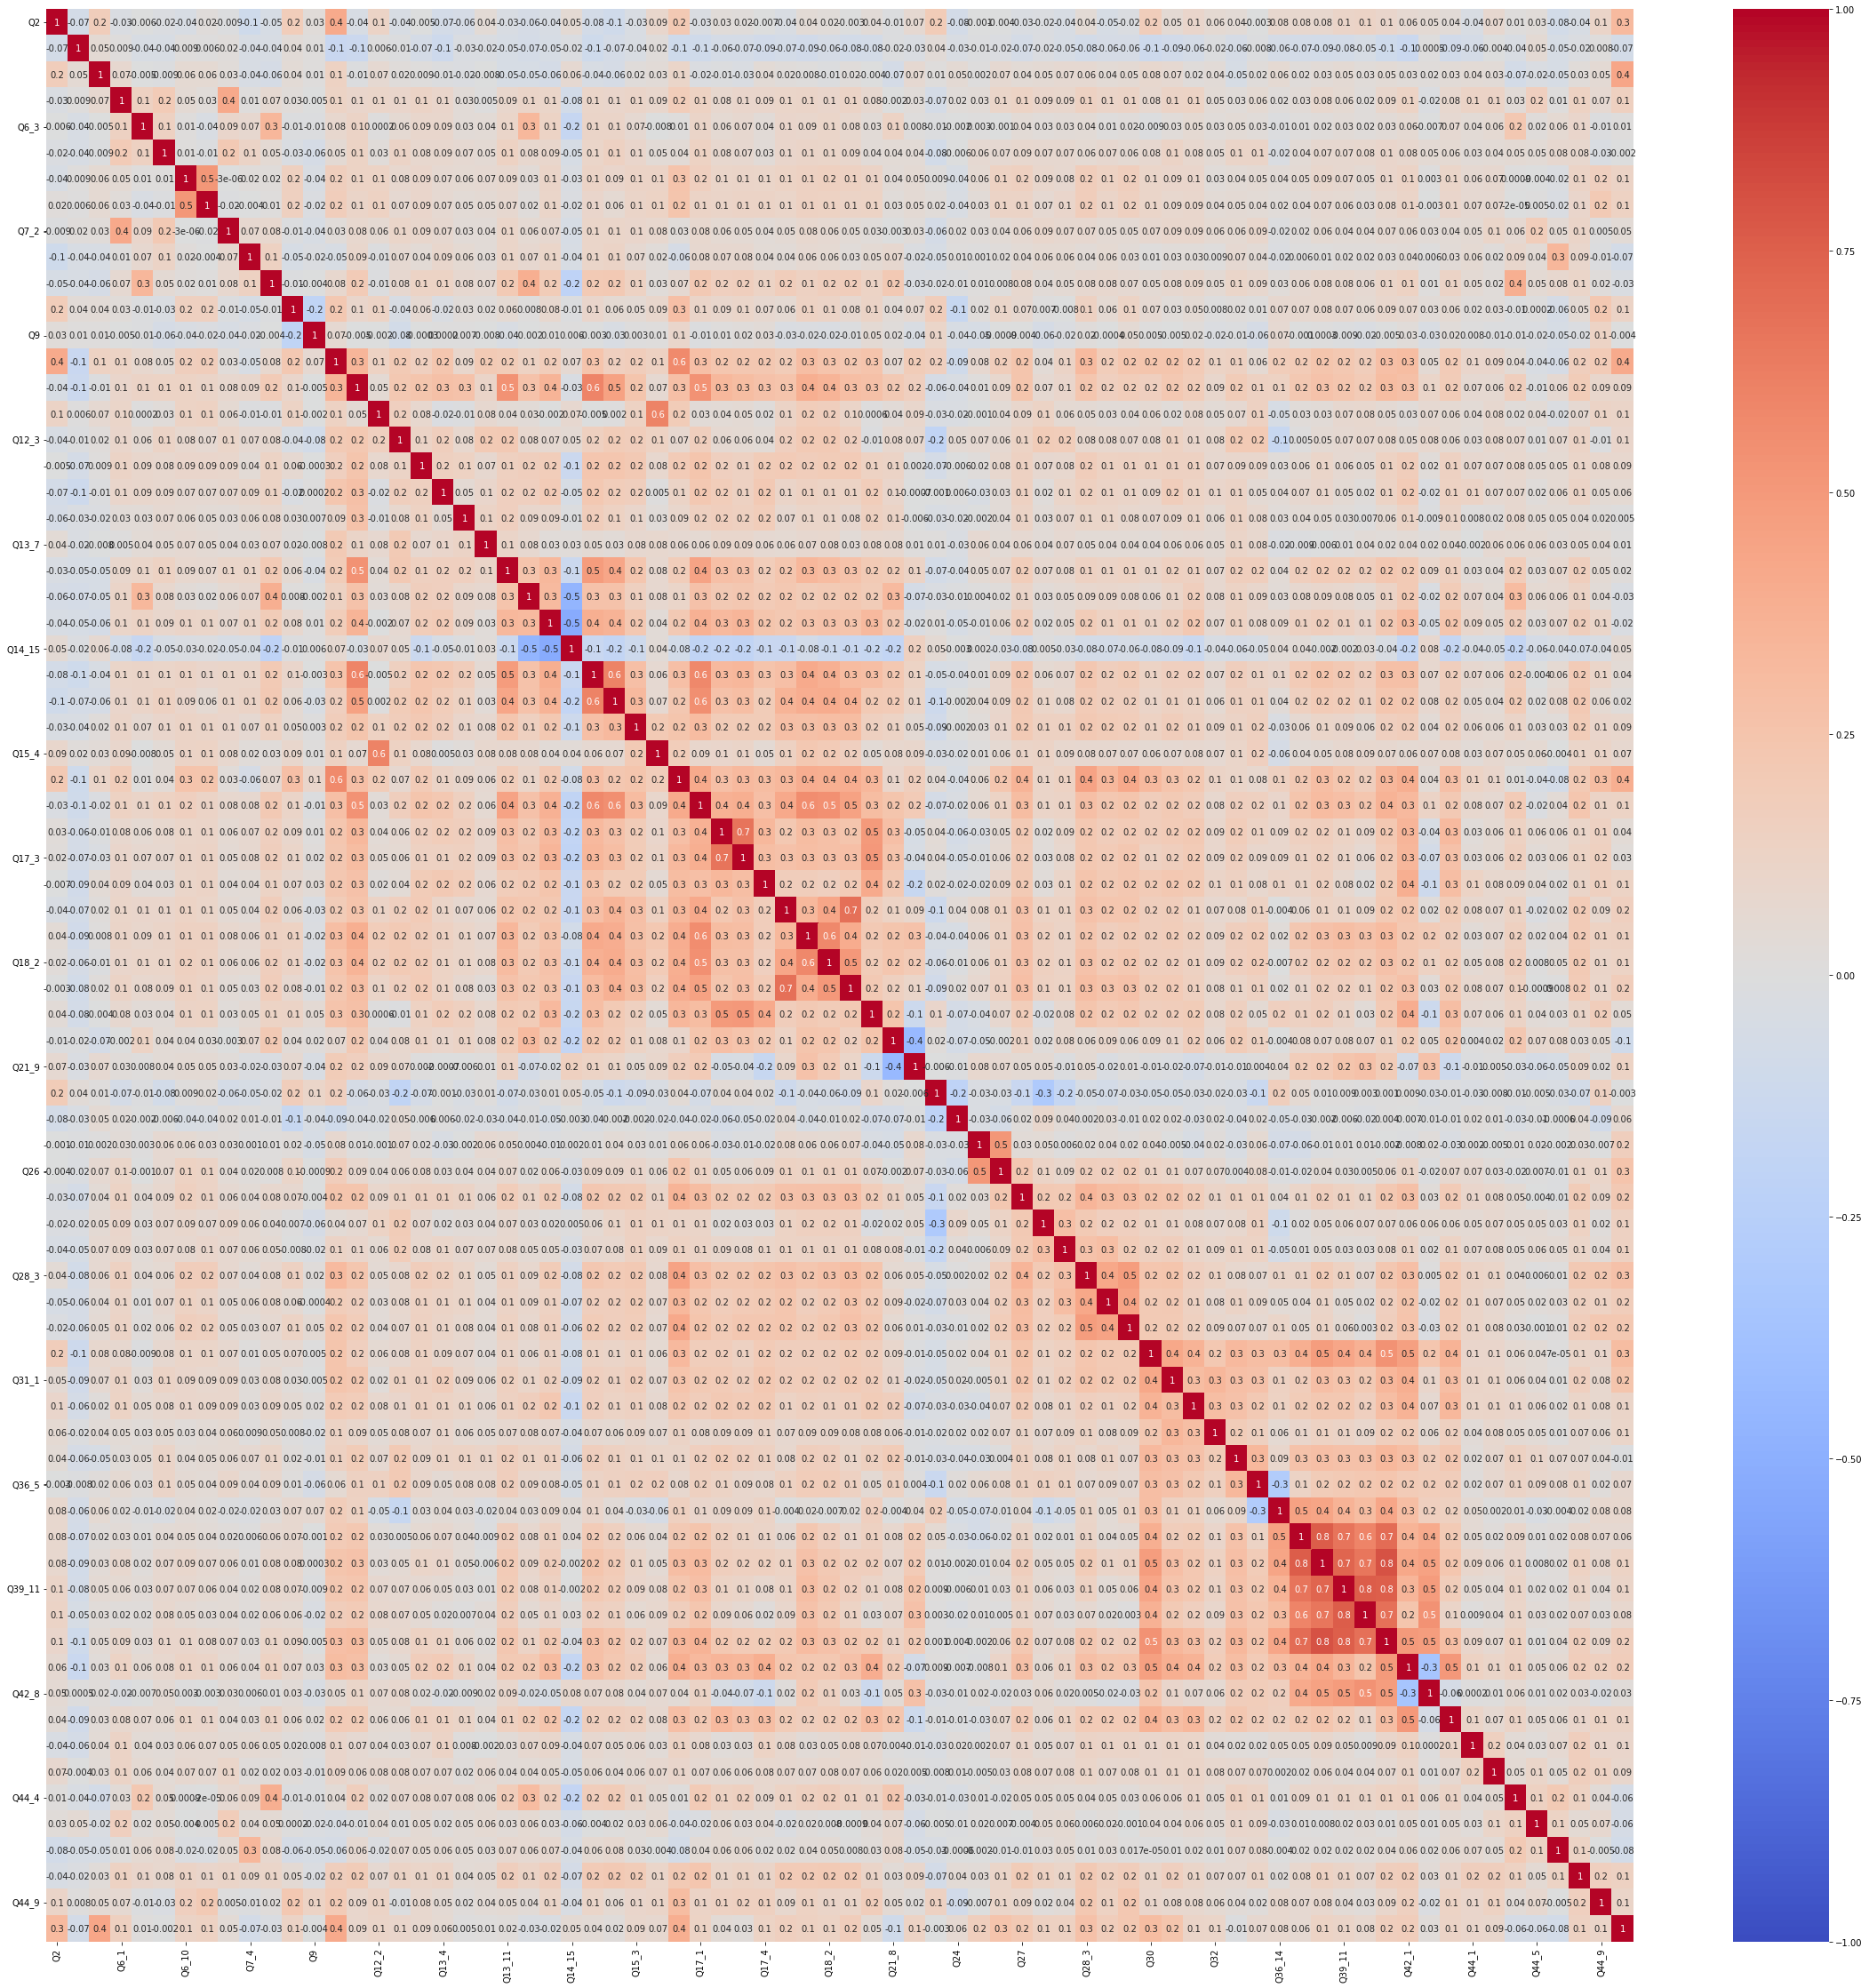

In [102]:
clean=clean.astype(int)
ax = sns.heatmap(clean.corr(),annot=True,fmt='.1g',vmin=-1, vmax=1, center= 0,cmap='coolwarm')
fig=plt.gcf()
fig.set_size_inches(40,40)
plt.show()

In [103]:
# feature importance

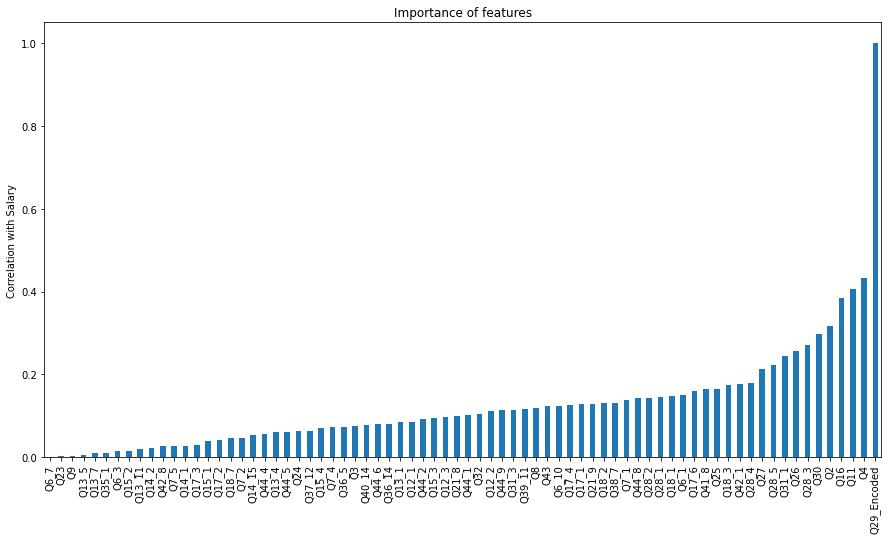

In [104]:
correlation = clean.corr().Q29_Encoded.apply(lambda x:abs(x)).sort_values()
ax = (correlation.plot(kind="bar",figsize=(15,8),title="Importance of features"))
ax.set_ylabel('Correlation with Salary')
plt.show()

Each square shows the correlation between the variables on each axis. The correlation varies from -1 to +1. Values ​​closer to zero mean that there is no linear trend between the two variables. Values ​​closer to +1 mean that there is a strong positive correlation between two variables. Values ​​closer to -1 mean that there is a strong negative correlation between two variables.All diagonals are  dark red because these squares correlate each variable to itself (hence a perfect correlation). The correlation graph is displayed as a heat map. a warmer color means a stronger positive correlation. 

As shown in the order of feature importantanc plot, "Country Q4" with corrlation value around 0.5 that most closely related to a respondent's annual compensation.The four most important characteristics are "Country Q4", "Years programming Q11", "Years used method Q16"and "Age Q2".

In [105]:
# feature engeering and and feature selection

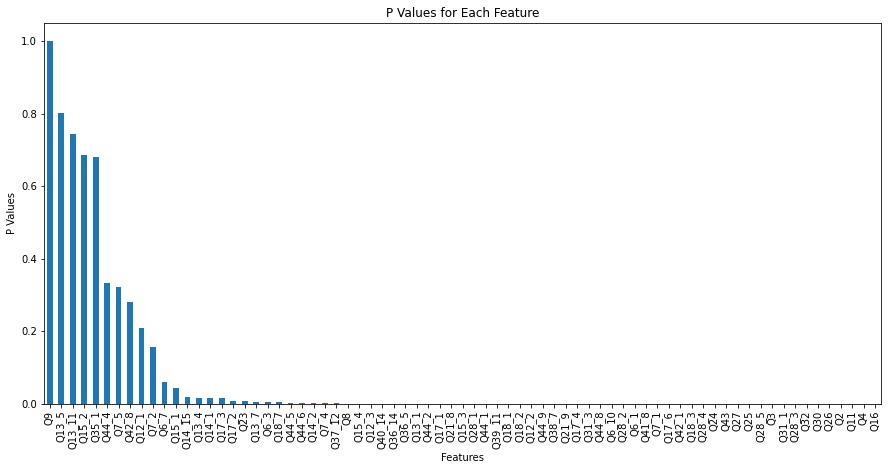

In [106]:
from sklearn.feature_selection import chi2
y = clean["Q29_Encoded"]
X = clean.drop('Q29_Encoded',axis=1)
cols = X.columns

chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
plt.figure(figsize=(15,7))
p_values.plot.bar()
plt.xlabel('Features')
plt.ylabel('P Values')
plt.title('P Values for Each Feature')
plt.show()

In [107]:
# drop the features that is not statistically significant
clean.drop(['Q9','Q13_5','Q13_11','Q15_2','Q35_1','Q44_4','Q7_5','Q42_8','Q12_1','Q7_2','Q6_7','Q15_1'],axis=1,inplace=True)
clean.head()

,Q2,Q3,Q4,Q6_1,Q6_3,Q6_10,Q7_1,Q7_4,Q8,Q11,...,Q41_8,Q42_1,Q43,Q44_1,Q44_2,Q44_5,Q44_6,Q44_8,Q44_9,Q29_Encoded
1,8,0,15,1,1,0,0,0,1,5,...,1,1,2,1,0,1,0,1,0,2
2,3,0,16,1,0,0,1,1,2,5,...,0,0,0,1,1,0,1,1,0,10
3,10,0,2,1,1,0,0,0,4,6,...,1,0,0,0,1,0,0,0,0,10
4,5,0,56,1,1,0,1,0,4,5,...,1,1,2,1,1,0,0,1,0,13
5,5,0,56,1,0,0,1,0,3,5,...,1,1,4,0,0,0,0,1,1,13


In [108]:
clean.shape

(8136, 62)

By now, all functions have been converted to categorical data. Feature selection can be done through statistical testing that examines the relationship between features and target annual variable compensation. 

The chi-square test of independence determines whether there is an association between the categorical variables. The null hypothesis for this test is that there is no association between the trait and the target salary variable.The alternative hypothesis is that there is a relationship between them. If there is a feature independent of the target variable, it is irrelevant and  can therefore be removed. 

Compute a chi-square test for each feature. By setting the confidence level to 0.05 when the p-value is less than 0.05, significant result, reject null hypothesis (H0), dependent; if p-value is greater than 0.05, non-significant result, the null hypothesis (H0) is not rejected.

# **Model implementation**

In [109]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [110]:
# Ordinal logistic regression

In [111]:
clean['Q29_Encoded'].unique()

array([ 2, 10, 13, 12,  9,  3,  0,  5, 11,  1,  8, 14,  7,  6,  4])

In [112]:
# First separate the data, X is data set, y is the data set without the target column.
X =clean.iloc[:,:-1]
y =clean.iloc[:,-1]

# split the training set into a training and validation set, 
# with a 70%-30% split. We do this with the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [113]:
def ordinary(X_train, y_train, x_test,model):
    y = []
    pr_0 = 0
    pro = []
    for j in range(0, 14):
      y = [] 
      for i in y_train:
        y.append(0 if i <= j else 1)
      model.fit(X_train, y)     
      p_pred = model.predict_proba(x_test)[:,0]
      p = p_pred - pr_0 
      pro.append(p)
      pr_0 = p_pred
    y = []
    for i in y_train:
        y.append(0 if i <= 13 else 1)
    model.fit(X_train, y)
    # probability for class 14
    p_pred_14 = model.predict_proba(x_test)[:,1]
    pro.append(p_pred_14)
    pro_best = np.argmax(pro, axis = 0)

    return pro_best 

In [114]:
#calculate accuracy across folds
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter = 1000)
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train)
accuracy_list = np.zeros(10)
np_idx= 0

#perform 10 fold cross validation 
for train_idx, val_idx in kfold.split(X_train): 
  #split the training set into new train and validation set
    X_tra, X_val = X_train.values[train_idx], X_train.values[val_idx]
    y_tra, y_val = y_train.values[train_idx], y_train.values[val_idx]
    
    #scale the dataset seperately
    X_tra = scaler.fit_transform(X_tra)
    X_val = scaler.fit_transform(X_val)
    
    #call the function to predict the probabilities for 15 classes
    pro_best = ordinary(X_tra, y_tra, X_val,model)
    acc = accuracy_score(pro_best, y_val)
    #accuracy_list[np_idx] = acc
    accuracy_list[np_idx] = acc*100
    np_idx +=1

    print("Fold {}: Accuracy: {}%".format(np_idx, round(acc,3))) 
    #print("Fold {}: Bias: {}%".format(np_idx, biaseach))
print ("Average Score: {}%({}%)".format(round(np.mean(accuracy_list),3),round(np.var(accuracy_list),3)))

Fold 1: Accuracy: 0.412%
Fold 2: Accuracy: 0.391%
Fold 3: Accuracy: 0.384%
Fold 4: Accuracy: 0.368%
Fold 5: Accuracy: 0.405%
Fold 6: Accuracy: 0.409%
Fold 7: Accuracy: 0.362%
Fold 8: Accuracy: 0.36%
Fold 9: Accuracy: 0.406%
Fold 10: Accuracy: 0.42%
Average Score: 39.192%(4.395%)


Ordinal logistic regression is where the dependent variable is ordinal. Multiple binary classification with orders is required before logistic regression is conducted. Since there are 15 classes in target variable salary, the binary classification is conducted by separating the classes from low to high. Let Y be an ordinal outcome with 15 categories. Then cumulative probability P(Y<=j) is the cumulative probabilities of Y less than or equal to a specific category j = 0, ..., 14. The probabilities for each class is calculated by the new cumulative probabilities minus last cumulative probabilities. For example, I computed the probabilities for class 0, class 0 + class 1, class 0 + class 1 + class 2, etc. And then, I get probabilities for class 0, class 1, class 2, etc. After the probability for each class is computed, the class with maximum probability for each observation is selected to finish the multi-class predictions. As a result, the accuracy scores across folds are pretty similar and the average accuracy score is 39.192% with the variance 0.044%.

In [115]:
# As the model accuracy shows above the fold 10 accuracy is the highest, which is 42.004%.

In [116]:
# Bias-variance trade-off
import statistics 

bias according to parameter C = [0.001,0.01,0.1,1,10,100]:  [0.14148476454293626, 0.2727279162819329, 0.4736709756848261, 0.6297017543859649, 0.7343151738996615, 0.8466230182663393, 1.1218680292466612, 1.2383107138195406, 1.4002128576849227, 1.4722687878309255]
variance according to parameter C = [0.001,0.01,0.1,1,10,100]:  [19.95798399507541, 20.72237919359803, 19.196995998768852, 19.371449676823637, 19.902323791935977, 20.01104518456516, 18.97705406148362, 20.69157804676907, 20.073912546600734, 21.093708013009593]


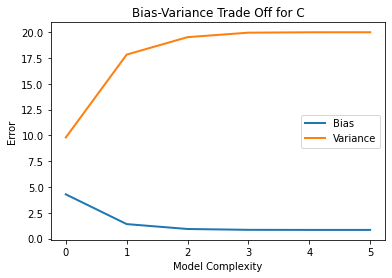

In [117]:
import statistics 
from statistics import mean

def bias(y,predictions):
    y = np.array(y)
    predictions = np.array(predictions)
    # Bias = (E(x_bar) - x)^2
    return np.power(np.mean(predictions - y),2)



meanbias1=[]
meanvar1=[]
C = [0.001,0.01,0.1,1,10,100]
for c in C: 
    np_idx = 0
    bias_c = np.zeros(10)
    variance_c = np.zeros(10)
    model = LogisticRegression(C=c)
    bias1 = []
    var1 = []

    #perform 10 fold cross validation 
    for train_idx, val_idx in kfold.split(X_train): #split the training set into new train and validation set
      X_tra, X_val = X_train.values[train_idx], X_train.values[val_idx]
      y_tra, y_val = y_train.values[train_idx], y_train.values[val_idx]
    
    #scale the dataset seperately
      X_tra = scaler.fit_transform(X_tra)
      X_val = scaler.fit_transform(X_val)

    #call the function to predict the probabilities for 15 classes
      pro_best = ordinary(X_tra, y_tra, X_val,model)
      bias_c[np_idx] = bias(y_val, pro_best)
      variance_c=np.mean(np.power(np.mean(pro_best)-pro_best,2))

      #print(variance_c)
      bias1.append(bias_c.mean())
      var1.append(variance_c.mean())
      np_idx += 1

    meanbias1.append(mean(bias1))
    meanvar1.append(mean(var1)) 

#plot Bias-Variance Trade Off for C
print("bias according to parameter C = [0.001,0.01,0.1,1,10,100]: ",bias1)
print("variance according to parameter C = [0.001,0.01,0.1,1,10,100]: ",var1)
C = [0.001,0.01,0.1,1,10,100]
plt.plot(meanbias1, label="Bias",linewidth = 2)
plt.plot(meanvar1, label="Variance", linewidth = 2)
plt.legend()
plt.title("Bias-Variance Trade Off for C")
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.show()

Bias of an estimator equals to the expected value of the estimator minus true value. I choose to use squared bias here to avoid negative bias value.

I tested parameter C in list [0.001,0.01,0.1,1,10,100] and also plot the bias variance trade-off. As the C change from 0.0001,0.001,0.01,1,10,100, the bias gets lower while variance gets larger. In order to decrease bias, complexity should be increased.


# **Model Tuning**

For the logistic regression function, the parameters are as following: 'penalty', 'dual', 'tol', 'C', 'fit_intercept', 'intercept_scaling', 'class_weight', 'random_state', 'solver', 'max_iter', 'multi_class', 'verbose', 'warm_start', 'n_jobs', 'l1_ratio'.

I select C and Solver for model tunning.

In [119]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
grid = {'C':[0.001,0.01,0.05,0.1,0.5,1,5,10, 100], 'solver':['newton-cg','lbfgs','liblinear','sag']}
model_cv = GridSearchCV(model, grid, cv=10)

model_cv.fit(X_train,y_train)
model_cv.best_estimator_.get_params()

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [120]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0



for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, val_idx in kfold.split(X_train):
          #split the training set into new train and validation set
          X_tra, X_val = X_train.values[train_idx], X_train.values[val_idx]
          y_tra, y_val = y_train.values[train_idx], y_train.values[val_idx]

          X_tra = scaler.fit_transform(X_tra)
          X_val = scaler.fit_transform(X_val)

          predictions = ordinary(X_tra, y_tra, X_val,model)
          acc = accuracy_score(predictions, y_val)
          accuracy[np_idx] = acc*100
         
          np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 0.01, 'solver': 'newton-cg'}
Best Score: 39.631%(2.084%)

The optimal log model uses C=0.01, and a newton-cg solver, and has a cross validation score of 39.631% with a standard deviation of 2.084%


The hyperparameters for logistic are as following: 'C', 'dual', 'fit_intercept',
 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs','penalty',
 'random_state', 'solver', 'tol', 'verbose', 'warm_start'.

I choose C and penalty for model tuning. 
- C is the inverse of regularization strength. For small values ​​of C, we increase the regularization strength, resulting in simple models that do not fit the data well. For large values ​​of C we lower the  regularization strength. 
- Solver: Algorithm to use in the optimization problem. Algorithm includes [‘newton_cg’, ’lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]. Default = ‘lbfgs’. For tuning we will try solver = ['newton cg','lbfgs','liblinear','sag'].
Grid search is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. In this case, I pass predefined values for hyperparameters "C" and "Solver" to the GridSearchCV function. GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross- Validation method. As a result, the optimal parameters for "C" and "Solver" are 0.01 and 'newton-cg' respectively with the highest accuracy 39.63%.

# **Testing & Discussion**

In [126]:
# First separate the data, X is data set, y is the data set without the target column.
X =clean.iloc[:,:-1]
y =clean.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)


scaler = StandardScaler()
model = LogisticRegression(C=0.1, solver=solver)
kfold = KFold(n_splits=10) 
kfold.get_n_splits(X)
np_idx = 0
accuracy_test = np.zeros(10)



for train_idx, test_idx in kfold.split(X):
    
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    #scale the dataset seperately
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    #call the function to predict the probabilities for 15 classes
    pro_best = ordinary(X_train, y_train, X_test,model)
    acc = accuracy_score(pro_best, y_test)

    #accuracy_list[np_idx] = acc*100
    accuracy_test[np_idx] = acc
    np_idx +=1
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(acc*100,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy_test)*100,3),round(np.var(accuracy_test)*100,3)))


Fold 1: Accuracy: 39.558%
Fold 2: Accuracy: 38.452%
Fold 3: Accuracy: 40.049%
Fold 4: Accuracy: 42.629%
Fold 5: Accuracy: 40.418%
Fold 6: Accuracy: 37.346%
Fold 7: Accuracy: 40.467%
Fold 8: Accuracy: 40.713%
Fold 9: Accuracy: 38.991%
Fold 10: Accuracy: 38.991%
Average Score: 39.762%(0.019%)


Q: Use your optimal model to make classifications on the test set. How does your model perform on the test set vs. the training set?

A: The training set is 39.19%, which shows in the previouse code, and the test set is 39.77%, which is a little bit higher than training set. The reason may be something in sampling, random seed. But the overall the performance is consistant.


Q:how to increase the accuracy (test, training)?

A: We can increase the accuracy through increase the number of the sample size for the minority class size, to make them more balanced dataset. Also try to use more other algorithm, in this assignment, we use the ordinal logistic regression, but we can try to use non linear model, such as decision tree model.


Q: Is it overfitting or underfitting?

A: Underfitting, because the accuracy is not high, and the bias is high & variance is low, which means model is not complex.



In [127]:
# Plot the distribution of true target variable values and their predictions on both the training set and test set

In [128]:
model = LogisticRegression(C=0.1, solver=solver)
model.fit(X_train,y_train)
prediction_test=model.predict(X_test)

model = LogisticRegression(C=0.1, solver=solver)
model.fit(X_train,y_train)
prediction_train=model.predict(X_train)


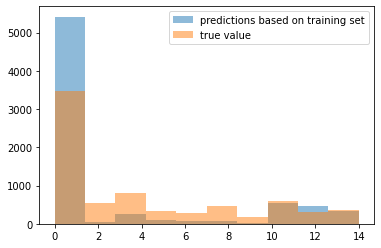

In [129]:
plt.hist(prediction_train,label='predictions based on training set',alpha=0.5)
plt.hist(y_train,label='true value',alpha=0.5)
plt.legend()
plt.show()


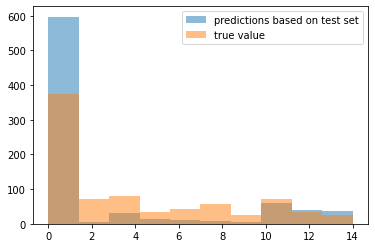

In [130]:
plt.hist(prediction_test,label='predictions based on test set',alpha=0.5)
plt.hist(y_test,label='true value',alpha=0.5)
plt.legend()
plt.show()

The predictions based on training set produces more results on class 0, class 10, 12 and class 14, while the predictions based on test set produces less results on all class 0 compared to true value. It is obvious that the true value is more spread out than the predictions, because the predictions are more likely be in class 0, class 10, 12 and class 14. In general, the predictions on yearly compensationcom is either very low or very high.